## Part I: Get and Explore the Data

In [2]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt
import numpy as np
import shapely
from IPython.core.pylabtools import figsize
figsize(8,8)

#### Get the Data: NYC Open Data Files

In [3]:
#boros
url_bb = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile"
boros = gpd.read_file(url_bb)
boros

,boro_code,boro_name,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353702,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,2.0,Bronx,1.187175e+09,463179.772813,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
2,1.0,Manhattan,6.365208e+08,357564.316391,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,3.0,Brooklyn,1.934143e+09,728197.541089,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731579,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


In [4]:
#community districts 
url_cd = "https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=Shapefile"
cds = gpd.read_file(url_cd)
cds.head()

,boro_cd,shape_area,shape_leng,geometry
0,308.0,4.560379e+07,38232.886649,"POLYGON ((-73.95829 40.67983, -73.95596 40.679..."
1,101.0,4.168665e+07,69054.447232,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
2,414.0,1.955766e+08,210918.175118,"MULTIPOLYGON (((-73.90972 40.56529, -73.90973 ..."
3,204.0,5.552214e+07,31358.450463,"POLYGON ((-73.90269 40.84458, -73.90271 40.844..."
4,501.0,3.772325e+08,153751.224394,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."


#### Get the Data: FRESH zones & stores

In [14]:
# FRESH zones 2019, convert to geojson
fresh_zones_shp = gpd.read_file("../data/raw/nycfreshzoning_20190731/nycfreshzoning_20190731.shp")
fresh_zones_shp.to_file('../data/transformed/fresh_zones.geojson', driver='GeoJSON')
fresh_zones = gpd.read_file('../data/transformed/fresh_zones.geojson')
fresh_zones

,Name,geometry
0,Zoning incentives,"MULTIPOLYGON (((998224.664 244155.619, 998220...."
1,Zoning and discretionary tax incentives,"MULTIPOLYGON (((1018397.478 236486.869, 101837..."
2,Discretionary tax incentives,"MULTIPOLYGON (((953342.074 157219.870, 953347...."


In [16]:
# FRESH stores 4/23, convert to geojson
fresh_stores_shp = gpd.read_file("../data/raw/FRESHStores_4_23/FRESH4_4_23.shp")
fresh_stores_shp.to_file('../data/transformed/fresh_stores.geojson', driver='GeoJSON')
fresh_stores = gpd.read_file('../data/transformed/fresh_stores.geojson')
fresh_stores.head()

,Address,BBL,Status,TotalSF,ORIG_FID,POINT_X,POINT_Y,geometry
0,2630 Frederick Douglass Boulevard,1.020268e+09,Occupied,"7,688",0,9.998091e+05,237932.800849,POINT (999809.087 237932.801)
1,223 St. Nicholas Avenue,1.019480e+09,Approved,"24,990",1,9.971770e+05,233703.103617,POINT (997177.021 233703.104)
2,2395 Frederick Douglass Boulevard,1.019550e+09,Occupied,"7,341",2,9.981479e+05,235313.096042,POINT (998147.896 235313.096)
3,1516 Park Avenue,1.016160e+09,Approved,"7,700",3,9.991880e+05,229282.633136,POINT (999187.976 229282.633)
4,2211 Third Avenue,1.017858e+09,Occupied,"12,194",4,1.001584e+06,231024.940181,POINT (1001583.561 231024.940)


#### Get the Data: US Census

In [ ]:
# set up API key here: https://api.census.gov/data/key_signup.html

In [17]:
# installing R to work with tidycensus library

In [20]:
#!pip install rpy2

In [21]:
%load_ext rpy2.ipython

C:\Users\abeme\miniconda3_2\envs\info615\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [22]:
from rpy2.robjects.packages import importr
utils = importr('utils')

In [29]:
#utils.install_packages('tidycensus', repos="https://cran.rstudio.com")
#utils.install_packages('tidyverse', repos="https://cran.rstudio.com")
#utils.install_packages('sf', repos="https://cran.rstudio.com")

R[write to console]: Installing package into 'C:/Users/abeme/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.2/tidycensus_1.3.2.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 3255321 bytes (3.1 MB)

R[write to console]: downloaded 3.1 MB




package 'tidycensus' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abeme\AppData\Local\Temp\RtmpW4CCXo\downloaded_packages


R[write to console]: Installing package into 'C:/Users/abeme/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.2/tidyverse_2.0.0.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 430885 bytes (420 KB)

R[write to console]: downloaded 420 KB




package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abeme\AppData\Local\Temp\RtmpW4CCXo\downloaded_packages


R[write to console]: Installing package into 'C:/Users/abeme/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.2/sf_1.0-12.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 27983170 bytes (26.7 MB)

R[write to console]: downloaded 26.7 MB




package 'sf' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abeme\AppData\Local\Temp\RtmpW4CCXo\downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x000001FFC79EF440> [RTYPES.NILSXP]

In [ ]:
# census_api_key("INSERT YOUR API KEY BELOW")

In [25]:
%%R
library(tidycensus)
library(tidyverse)
library(sf)
library(tigris)

census_api_key("d1adbf94a24345daf290f226bdbe9c8e280189b0", install='True')

R[write to console]: Your API key has been stored in your .Renviron and can be accessed by Sys.getenv("CENSUS_API_KEY"). 
To use now, restart R or run `readRenviron("~/.Renviron")`



[1] "d1adbf94a24345daf290f226bdbe9c8e280189b0"


#### review census table IDs for 2011 and 2019

In [26]:
%%R

BK2011 <- load_variables(2011, "acs5", cache = TRUE)

write.csv(BK2011, "../data/2011_census_ids.csv")

In [ ]:
# view 2011_census_ids in excel (total population, race, household income, and year structure built)

In [27]:
%%R

BK2019 <- load_variables(2019, "acs5", cache = TRUE)

write.csv(BK2019, "../data/2019_census_ids.csv")

In [28]:
# view 2019_census_ids in excel (total population, race, household income, and year structure built)

##### median household income (2019)

In [29]:
%%R

median_hhi_tract_19_clipped <- get_acs(
  geography = "tract",
  variables = "B19013_001",
  state = "NY",
  county = "Kings",
  year = 2019,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2015-2019 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'



  |======================================================================| 100%


R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



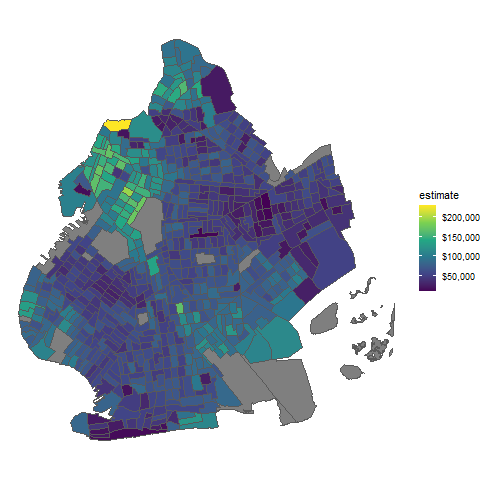

In [30]:
%%R
ggplot(median_hhi_tract_19_clipped, aes(fill = estimate)) + 
  geom_sf() + 
  theme_void() + 
  scale_fill_viridis_c(labels = scales::dollar)

In [ ]:
# export R result into a geojson to work in py's geopandas 

In [31]:
%%R
st_write(median_hhi_tract_19_clipped, "../data/transformed/bk_19_median_hhi_clip.geojson")

Writing layer `bk_19_median_hhi_clip' to data source 
  `../data/transformed/bk_19_median_hhi_clip.geojson' using driver `GeoJSON'
Writing 760 features with 5 fields and geometry type Unknown (any).


In [26]:
gdf = gpd.read_file("bk_19_median_hhi_clip.geojson")

In [27]:
gdf.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36047057800,"Census Tract 578, Kings County, New York",B19013_001,47466.0,25310.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,"Census Tract 589, Kings County, New York",B19013_001,85500.0,22226.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,"Census Tract 370, Kings County, New York",B19013_001,57888.0,13554.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,"Census Tract 199, Kings County, New York",B19013_001,108333.0,21279.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,"Census Tract 400, Kings County, New York",B19013_001,52125.0,17412.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."


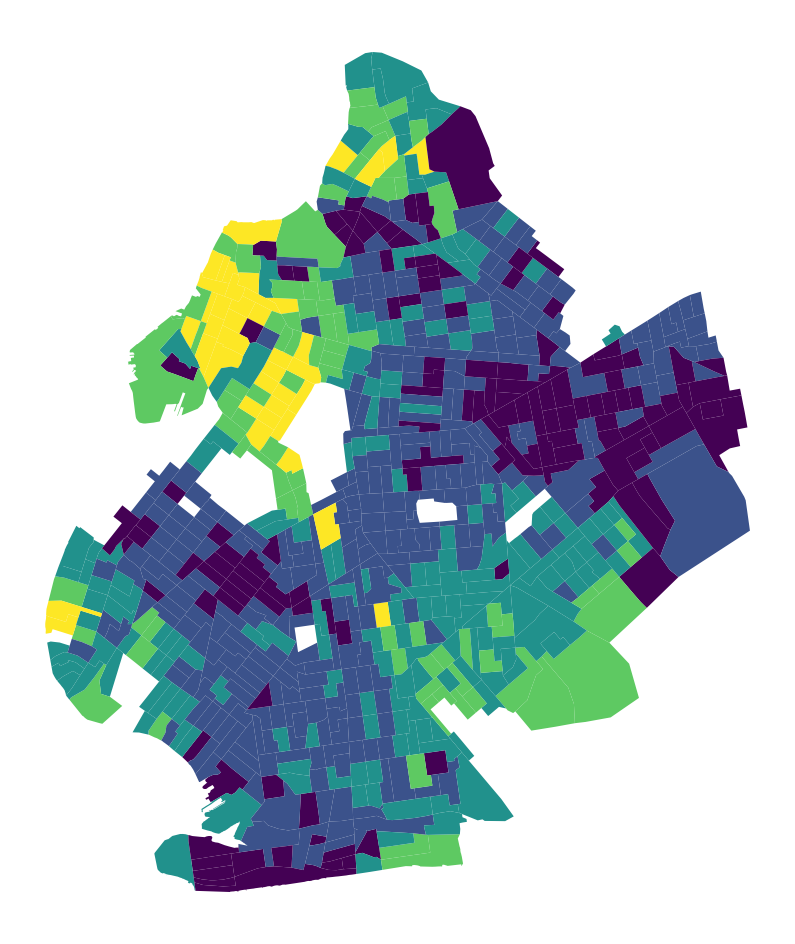

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
gdf.plot(ax=ax, column='estimate', scheme='fisher_jenks')
ax.axis('off');

#### median household income (2011)

In [32]:
%%R

median_hhi_tract_11_clipped <- get_acs(
  geography = "tract",
  variables = "B19013_001",
  state = "NY",
  county = "Kings",
  year = 2011,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2007-2011 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'



  |======================================================================| 100%


R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



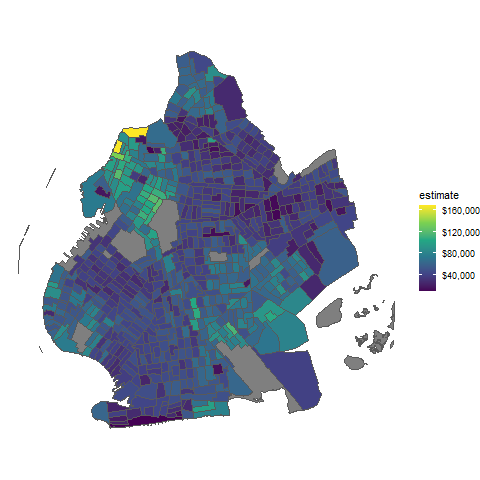

In [33]:
%%R
ggplot(median_hhi_tract_11_clipped, aes(fill = estimate)) + 
  geom_sf() + 
  theme_void() + 
  scale_fill_viridis_c(labels = scales::dollar)

In [34]:
%%R
st_write(median_hhi_tract_11_clipped, "../data/transformed/bk_11_median_hhi_clip.geojson")

Writing layer `bk_11_median_hhi_clip' to data source 
  `../data/transformed/bk_11_median_hhi_clip.geojson' using driver `GeoJSON'
Writing 761 features with 5 fields and geometry type Unknown (any).


In [33]:
hh_inc_11 = gpd.read_file("bk_11_median_hhi_clip.geojson")

In [34]:
hh_inc_11.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36047029700,"Census Tract 297, Kings County, New York",B19013_001,57284.0,14574.0,"POLYGON ((-73.93133 40.67937, -73.93290 40.679..."
1,36047029800,"Census Tract 298, Kings County, New York",B19013_001,47779.0,8344.0,"POLYGON ((-73.98575 40.59704, -73.98646 40.597..."
2,36047029900,"Census Tract 299, Kings County, New York",B19013_001,34205.0,14938.0,"POLYGON ((-73.92182 40.67702, -73.92281 40.677..."
3,36047030000,"Census Tract 300, Kings County, New York",B19013_001,39306.0,8717.0,"POLYGON ((-73.98468 40.59366, -73.98602 40.594..."
4,36047030100,"Census Tract 301, Kings County, New York",B19013_001,42206.0,4870.0,"POLYGON ((-73.91081 40.67752, -73.91093 40.676..."


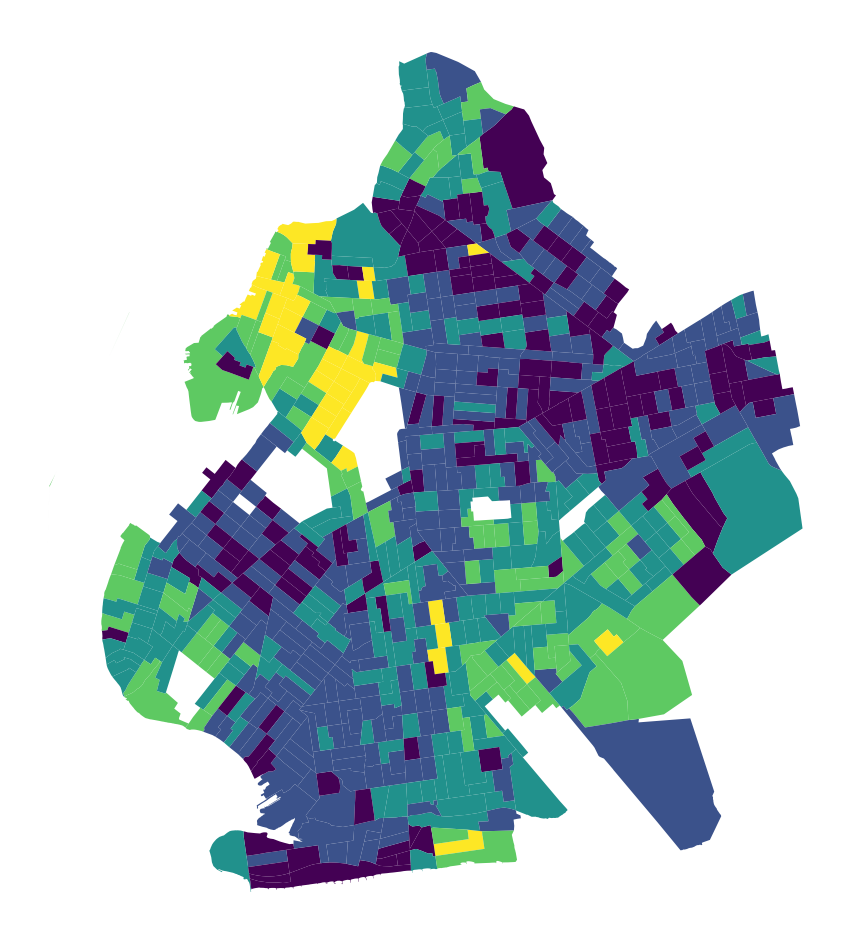

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
hh_inc_11.plot(ax=ax, column='estimate', scheme='fisher_jenks')
ax.axis('off');

#### total population, race by white population (2019)

##### total population 2019

In [36]:
%%R

tot_pop_19_clipped <- get_acs(
  geography = "tract",
  variables = "B01003_001",
  state = "NY",
  county = "Kings",
  year = 2019,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2015-2019 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



In [37]:
%%R
st_write(tot_pop_19_clipped, "../data/transformed/tot_pop_19_clip.geojson")

Writing layer `tot_pop_19_clip' to data source 
  `../data/transformed/tot_pop_19_clip.geojson' using driver `GeoJSON'
Writing 760 features with 5 fields and geometry type Unknown (any).


In [9]:
gpd.read_file("tot_pop_19_clip.geojson")

,GEOID,NAME,variable,estimate,moe,geometry
0,36047057800,"Census Tract 578, Kings County, New York",B01003_001,3260.0,376.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,"Census Tract 589, Kings County, New York",B01003_001,1691.0,172.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,"Census Tract 370, Kings County, New York",B01003_001,4231.0,395.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,"Census Tract 199, Kings County, New York",B01003_001,3432.0,323.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,"Census Tract 400, Kings County, New York",B01003_001,3003.0,282.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."
...,...,...,...,...,...,...
755,36047010200,"Census Tract 102, Kings County, New York",B01003_001,4698.0,570.0,"POLYGON ((-74.01498 40.64063, -74.01381 40.641..."
756,36047082600,"Census Tract 826, Kings County, New York",B01003_001,4911.0,667.0,"POLYGON ((-73.94915 40.64689, -73.94724 40.646..."
757,36047023400,"Census Tract 234, Kings County, New York",B01003_001,4563.0,792.0,"POLYGON ((-73.99096 40.63614, -73.99037 40.636..."
758,36047017700,"Census Tract 177, Kings County, New York",B01003_001,0.0,12.0,"POLYGON ((-73.97965 40.66124, -73.97835 40.662..."


##### white population 2019

In [38]:
%%R

yt_tract_19_clipped <- get_acs(
  geography = "tract",
  variables = "B02001_002",
  state = "NY",
  county = "Kings",
  year = 2019,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2015-2019 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



In [40]:
%%R
st_write(yt_tract_19_clipped, "../data/transformed/yt_19_clipped.geojson")

Writing layer `yt_19_clipped' to data source 
  `../data/transformed/yt_19_clipped.geojson' using driver `GeoJSON'
Writing 760 features with 5 fields and geometry type Unknown (any).


In [41]:
yt_19 = gpd.read_file("yt_19_clipped.geojson")
yt_19.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36047057800,"Census Tract 578, Kings County, New York",B02001_002,1862.0,360.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,"Census Tract 589, Kings County, New York",B02001_002,1557.0,179.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,"Census Tract 370, Kings County, New York",B02001_002,2885.0,351.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,"Census Tract 199, Kings County, New York",B02001_002,2063.0,285.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,"Census Tract 400, Kings County, New York",B02001_002,1339.0,282.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."


#### total population, race / white only (2011)

##### total population 2011

In [43]:
%%R

tot_pop_11_clipped <- get_acs(
  geography = "tract",
  variables = "B01003_001",
  state = "NY",
  county = "Kings",
  year = 2011,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2007-2011 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



In [45]:
%%R
st_write(tot_pop_11_clipped, "../data/transformed/tot_pop_11_clip.geojson")

Writing layer `tot_pop_11_clip' to data source 
  `../data/transformed/tot_pop_11_clip.geojson' using driver `GeoJSON'
Writing 761 features with 5 fields and geometry type Unknown (any).


In [46]:
gpd.read_file("tot_pop_11_clip.geojson")

,GEOID,NAME,variable,estimate,geometry
0,36047029700,"Census Tract 297, Kings County, New York",B00001_001,213.0,"POLYGON ((-73.93133 40.67937, -73.93290 40.679..."
1,36047029800,"Census Tract 298, Kings County, New York",B00001_001,244.0,"POLYGON ((-73.98575 40.59704, -73.98646 40.597..."
2,36047029900,"Census Tract 299, Kings County, New York",B00001_001,184.0,"POLYGON ((-73.92182 40.67702, -73.92281 40.677..."
3,36047030000,"Census Tract 300, Kings County, New York",B00001_001,229.0,"POLYGON ((-73.98468 40.59366, -73.98602 40.594..."
4,36047030100,"Census Tract 301, Kings County, New York",B00001_001,158.0,"POLYGON ((-73.91081 40.67752, -73.91093 40.676..."
...,...,...,...,...,...
756,36047078600,"Census Tract 786, Kings County, New York",B00001_001,283.0,"POLYGON ((-73.94463 40.63184, -73.94562 40.631..."
757,36047078800,"Census Tract 788, Kings County, New York",B00001_001,222.0,"POLYGON ((-73.94645 40.63872, -73.94537 40.638..."
758,36047079000,"Census Tract 790, Kings County, New York",B00001_001,324.0,"POLYGON ((-73.95116 40.63843, -73.95213 40.638..."
759,36047079200,"Census Tract 792, Kings County, New York",B00001_001,243.0,"POLYGON ((-73.95262 40.64301, -73.95356 40.642..."


##### white population 2011

In [47]:
%%R

yt_tract_11_clipped <- get_acs(
  geography = "tract",
  variables = "B02001_002",
  state = "NY",
  county = "Kings",
  year = 2011,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2007-2011 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



In [48]:
%%R
st_write(yt_tract_11_clipped, "../data/transformed/yt_11_clipped.geojson")

Writing layer `yt_11_clipped' to data source 
  `../data/transformed/yt_11_clipped.geojson' using driver `GeoJSON'
Writing 761 features with 5 fields and geometry type Unknown (any).


In [49]:
yt_11 = gpd.read_file("yt_11_clipped.geojson")
yt_11.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36047029700,"Census Tract 297, Kings County, New York",B02001_002,222.0,128.0,"POLYGON ((-73.93133 40.67937, -73.93290 40.679..."
1,36047029800,"Census Tract 298, Kings County, New York",B02001_002,2584.0,454.0,"POLYGON ((-73.98575 40.59704, -73.98646 40.597..."
2,36047029900,"Census Tract 299, Kings County, New York",B02001_002,61.0,56.0,"POLYGON ((-73.92182 40.67702, -73.92281 40.677..."
3,36047030000,"Census Tract 300, Kings County, New York",B02001_002,1348.0,283.0,"POLYGON ((-73.98468 40.59366, -73.98602 40.594..."
4,36047030100,"Census Tract 301, Kings County, New York",B02001_002,24.0,31.0,"POLYGON ((-73.91081 40.67752, -73.91093 40.676..."


#### Year structure built (2019 only)

In [50]:
%%R

year_built_19_clipped <- get_acs(
  geography = "tract",
  variables = "B25034_002",
  state = "NY",
  county = "Kings",
  year = 2019,
  geometry = TRUE
) %>%
  st_transform(6933) %>%
  erase_water(area_threshold = 0.75) %>%
    st_transform(4326)

R[write to console]: Getting data from the 2015-2019 5-year ACS

R[write to console]: Downloading feature geometry from the Census website.  To cache shapefiles for use in future sessions, set `options(tigris_use_cache = TRUE)`.

R[write to console]: Using FIPS code '36' for state 'NY'

R[write to console]: Using FIPS code '047' for 'Kings County'

R[write to console]: Fetching area water data for your dataset's location...

R[write to console]: Erasing water area...
If this is slow, try a larger area threshold value.



In [51]:
%%R
st_write(year_built_19_clipped, "../data/transformed/built_19_clipped.geojson")

Writing layer `built_19_clipped' to data source 
  `../data/transformed/built_19_clipped.geojson' using driver `GeoJSON'
Writing 760 features with 5 fields and geometry type Unknown (any).


In [52]:
built_19 = gpd.read_file("built_19_clipped.geojson")
built_19.head()

,GEOID,NAME,variable,estimate,moe,geometry
0,36047057800,"Census Tract 578, Kings County, New York",B25034_002,15.0,17.0,"POLYGON ((-73.95304 40.60151, -73.95183 40.601..."
1,36047058900,"Census Tract 589, Kings County, New York",B25034_002,0.0,12.0,"POLYGON ((-73.94419 40.72944, -73.94461 40.732..."
2,36047037000,"Census Tract 370, Kings County, New York",B25034_002,0.0,12.0,"POLYGON ((-73.96564 40.58889, -73.96530 40.590..."
3,36047019900,"Census Tract 199, Kings County, New York",B25034_002,23.0,26.0,"POLYGON ((-73.96749 40.68652, -73.96552 40.686..."
4,36047040000,"Census Tract 400, Kings County, New York",B25034_002,0.0,12.0,"POLYGON ((-73.97986 40.59855, -73.97935 40.598..."
